In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, stdev
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
top = pd.read_csv("top_users_vids.csv")
sug = pd.read_csv("sug_users_vids_all.csv")

In [65]:
new_sug = sug.loc[sug['n_plays'] < 10000000]

In [3]:
just_users = sug[['user_name', 'n_followers', 'n_total_likes', 'n_total_vids']].drop_duplicates('user_name')
just_users

user_name  n_followers  n_total_likes  n_total_vids
0                  john.cena10      1000000        4700000           211
25     robertdowneyjnrofficial       651100         144000             3
28                        shaq      2500000        4800000            62
53                   lazarbeam      5900000       44500000            51
78                     mrbeast     12600000      141000000           129
...                        ...          ...            ...           ...
41577               briteresi0        74100         287900            90
41602               lynaperezz      3200000       41800000           243
41627            girlgainzblog        59700         246800           203
41652                berryemi1       144000         455000           119
41677          victoriabachlet      3600000      141500000           987

[1705 rows x 4 columns]

<AxesSubplot:ylabel='Frequency'>

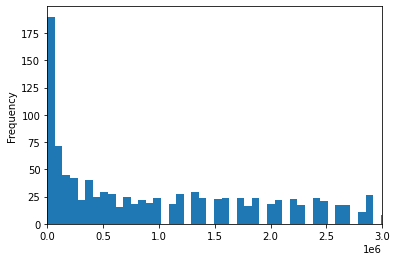

In [4]:
just_users['n_followers'].plot.hist(bins=1000, xlim=(0,3000000))

In [5]:
by_user = {}
for i in just_users['user_name']:
    by_user[i] = sug[sug['user_name'] == i][1:].reset_index(drop = True)
    # ignored first entry because vid might have been posted recently
by_user

{'john.cena10':                      id  create_time    user_name  \
 0   6891790235336822018   1604619960  john.cena10   
 1   6891264678832475393   1604497592  john.cena10   
 2   6891050048403049730   1604447622  john.cena10   
 3   6890886086613126402   1604409445  john.cena10   
 4   6890500322096123137   1604319627  john.cena10   
 5   6890125844249955586   1604232437  john.cena10   
 6   6889360947706645761   1604054346  john.cena10   
 7   6889023239843024129   1603975717  john.cena10   
 8   6888996992249335041   1603969606  john.cena10   
 9   6888981279170120961   1603965947  john.cena10   
 10  6888590122749545729   1603874874  john.cena10   
 11  6888250161005481218   1603795721  john.cena10   
 12  6888232349104966913   1603791574  john.cena10   
 13  6887916512913509634   1603718037  john.cena10   
 14  6887511753413004546   1603623797  john.cena10   
 15  6886743242625305857   1603444865  john.cena10   
 16  6886742589534375170   1603444712  john.cena10   
 17  68863878

In [6]:
def upper_outliers(x, std = 1):
    outliers_index = []
    Xmean = mean(x)
    Xstd = stdev(x)
    limit = Xmean + std*Xstd
    for i, val in enumerate(x):
        if val > limit:
            outliers_index.append(i)
    return outliers_index

In [7]:
users_outliers_1 = {}
users_outliers_2 = {}
for i in by_user:
    try:
        users_outliers_1[i] = by_user[i].loc[upper_outliers(by_user[i]['n_plays'], 1)].reset_index(drop = True)
        users_outliers_2[i] = by_user[i].loc[upper_outliers(by_user[i]['n_plays'], 2)].reset_index(drop = True)
    except:
        pass # users might have less than 2 posts

### Removing users with no outliers

In [8]:
no_outliers_1 = []
no_outliers_2 = []
for i in users_outliers_1:
    if len(users_outliers_1[i]) == 0:
        no_outliers_1.append(i)
    if len(users_outliers_2[i]) == 0:
        no_outliers_2.append(i)

print(len(users_outliers_1), len(no_outliers_1))
print('\n')
print(len(users_outliers_2), len(no_outliers_2))

1700 3


1700 64


In [9]:
[users_outliers_1.pop(key) for key in no_outliers_1]
[users_outliers_2.pop(key) for key in no_outliers_2]


print(len(users_outliers_1))
print('\n')
print(len(users_outliers_2))

1697


1636


### Reforming outlier dictionaries back into data frames

In [10]:
outliers_1_df = pd.concat([users_outliers_1[i] for i in users_outliers_1]).reset_index(drop = True)
outliers_1_df

id  create_time        user_name  \
0     6889360947706645761   1604054346      john.cena10   
1     6885291574440348929   1603106872      john.cena10   
2     6853058054976507142   1595601921             shaq   
3     6790429245559622918   1581020013             shaq   
4     6790428877572427014   1581019928             shaq   
...                   ...          ...              ...   
4415  6873789877025115393   1600428924    girlgainzblog   
4416  6861964801883589894   1597675688    girlgainzblog   
4417  6862810678760197382   1597872633        berryemi1   
4418  6860508377064295686   1597336586        berryemi1   
4419  6890628519315918085   1604349509  victoriabachlet   

                                               hashtags               song  \
0            ['foryoupage', 'fyp', 'johncena', 'viral']       الصوت الأصلي   
1     ['johncena', 'fyp', 'viral_video', 'tiktok', '...  оригинальный звук   
2                        ['HandShaq', 'GoldBond', 'ad']     original sound   
3                                                    []     original sound   
4                                                    []     original sound   
...                                                 ...                ...   
4415        ['fitness', 'gymbuddy', 'comedy', 'foryou']         M to the B   
4416                           ['viral', 'boots', 'fy']             Kismet   
4417  ['dontletthisflop', 'transition', 'readySETgo'...        Hugh Hefner   
4418  ['toystory', 'JustVisiting', 'fyp', 'xyzbca', ...     original sound   
4419                                                 []       Atlas: Touch   

      video_length  n_likes  n_shares  n_comments  n_plays  n_followers  \
0               33    39900       395         325   255800      1000000   
1               60    23000       121         190   156300      1000000   
2               15   415000      1542        2162  2900000      2500000   
3                9   275600      2789        1129  3200000      2500000   
4                8   614400     12500        1913  7800000      2500000   
...            ...      ...       ...         ...      ...          ...   
4415            10     2511        10          70   103000        59700   
4416             7    10100       193         118   118900        59700   
4417             9    43900      1000         367   496300       144000   
4418            14    29600       344         155   168200       144000   
4419            48   493900      6212        2379  3700000      3600000   

      n_total_likes  n_total_vids  
0           4700000           211  
1           4700000           211  
2           4800000            62  
3           4800000            62  
4           4800000            62  
...             ...           ...  
4415         246800           203  
4416         246800           203  
4417         455000           119  
4418         455000           119  
4419      141500000           987  

[4420 rows x 13 columns]

In [11]:
outliers_2_df = pd.concat([users_outliers_2[i] for i in users_outliers_2]).reset_index(drop = True)
outliers_2_df

id  create_time        user_name  \
0     6889360947706645761   1604054346      john.cena10   
1     6790428877572427014   1581019928             shaq   
2     6828356531696749829   1589850647        lazarbeam   
3     6851992917385432326   1595353928          mrbeast   
4     6850134682965773573   1594921269          mrbeast   
...                   ...          ...              ...   
2224  6890317370418646277   1604277062       lynaperezz   
2225  6864231082984803589   1598203346       lynaperezz   
2226  6874600305057697025   1600617616    girlgainzblog   
2227  6862810678760197382   1597872633        berryemi1   
2228  6890628519315918085   1604349509  victoriabachlet   

                                               hashtags  \
0            ['foryoupage', 'fyp', 'johncena', 'viral']   
1                                                    []   
2                                                    []   
3                                                    []   
4                                                    []   
...                                                 ...   
2224                                     ['fup', 'fyp']   
2225                                     ['fyp', 'fup']   
2226              ['splash', 'whilstyouwait', 'foryou']   
2227  ['dontletthisflop', 'transition', 'readySETgo'...   
2228                                                 []   

                                  song  video_length  n_likes  n_shares  \
0                         الصوت الأصلي            33    39900       395   
1                       original sound             8   614400     12500   
2                       original sound             9  4100000     80700   
3                             Trap Sax            10  2200000      3788   
4      Ocarina of Time - Kokiri Forest            18  2300000      7442   
...                                ...           ...      ...       ...   
2224                    original sound            59  1300000     22900   
2225               No Guidance (Remix)            11   969200     28400   
2226  SPLASH MASHUP CHALLENGE BY DJ CJ             7     3728         7   
2227                       Hugh Hefner             9    43900      1000   
2228                      Atlas: Touch            48   493900      6212   

      n_comments   n_plays  n_followers  n_total_likes  n_total_vids  
0            325    255800      1000000        4700000           211  
1           1913   7800000      2500000        4800000            62  
2          55700  32200000      5900000       44500000            51  
3          11600  15600000     12600000      141000000           129  
4          34600  16700000     12600000      141000000           129  
...          ...       ...          ...            ...           ...  
2224       14600   9800000      3200000       41800000           243  
2225       26400  10200000      3200000       41800000           243  
2226          22    186300        59700         246800           203  
2227         367    496300       144000         455000           119  
2228        2379   3700000      3600000      141500000           987  

[2229 rows x 13 columns]

In [12]:
non_outliers_1_df = pd.concat([sug, outliers_1_df]).drop_duplicates(keep=False).reset_index(drop = True)
non_outliers_2_df = pd.concat([sug, outliers_2_df]).drop_duplicates(keep=False).reset_index(drop = True)

In [13]:
print("outliers of 1 std:", len(outliers_1_df))
print("non-outliers:", len(non_outliers_1_df))

outliers of 1 std: 4420
non-outliers: 37244


In [14]:
print("outliers of 2 std:", len(outliers_2_df))
print("non-outliers:", len(non_outliers_2_df))

outliers of 2 std: 2229
non-outliers: 39435


## Frequency of length of video
min 3 sec\
max 60 sec

<AxesSubplot:ylabel='Frequency'>

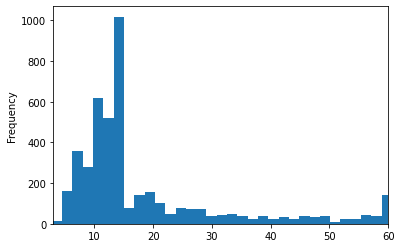

In [15]:
outliers_1_df['video_length'].plot.hist(bins=57, xlim=(3,60))

<AxesSubplot:ylabel='Frequency'>

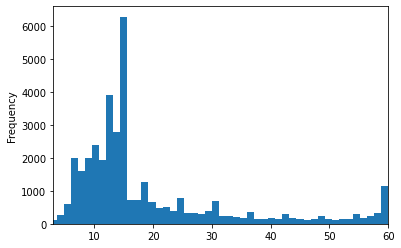

In [16]:
non_outliers_1_df['video_length'].plot.hist(bins=150, xlim=(3,60))

### see how shares correlate to views

In [73]:
x = new_sug['video_length'].tolist()
y = new_sug['n_plays'].tolist()

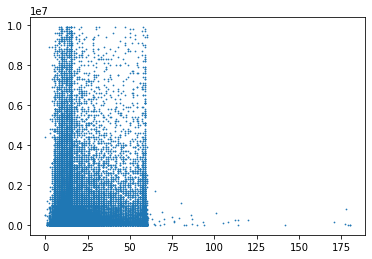

In [74]:
plt.scatter(x, y, s=.5)

### amnt of hashtags

see if the amount of hashtags in teh description affect vid performance

In [19]:
def amnt_of_hashtags(x):
    amnt = []
    for i in x:
        if i.replace("'", "").strip('][').split(', ') == ['']:
            amnt.append(0)
        else:
            amnt.append(len(i.replace("'", "").strip('][').split(', ')))
    return amnt

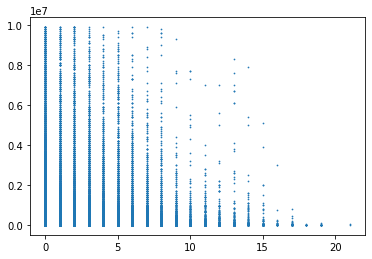

In [123]:
x_axis = amnt_of_hashtags(new_sug["hashtags"])
y_axis = new_sug["n_plays"].tolist()

plt.scatter(x_axis, y_axis, s=.5)
plt.savefig('amnt_hashtags_and_plays', facecolor='w')

/Users/ivant/Desktop/DataRes/TikTok/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


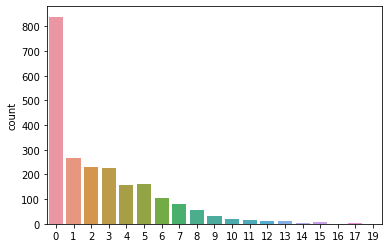

In [124]:
sns.countplot(amnt_of_hashtags(outliers_2_df['hashtags']))
plt.savefig('outliers_hash_freq.png', facecolor='w')

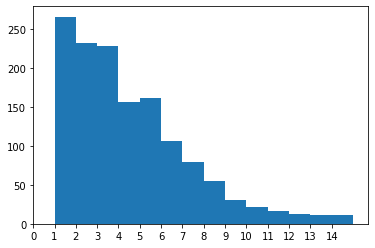

In [97]:
plt.hist(amnt_of_hashtags(outliers_2_df['hashtags']), bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.xticks(np.arange(0, 15, 1))
plt.show()

(array([1.9959e+04, 3.9430e+03, 4.1520e+03, 2.8690e+03, 2.4950e+03,
        1.8540e+03, 1.2720e+03, 9.3700e+02, 6.5200e+02, 3.3800e+02,
        2.7100e+02, 2.4000e+02, 1.8400e+02, 1.0100e+02, 7.6000e+01,
        2.0000e+01, 4.5000e+01, 1.0000e+01, 1.5000e+01, 2.0000e+00]),
 array([ 0.  ,  1.05,  2.1 ,  3.15,  4.2 ,  5.25,  6.3 ,  7.35,  8.4 ,
         9.45, 10.5 , 11.55, 12.6 , 13.65, 14.7 , 15.75, 16.8 , 17.85,
        18.9 , 19.95, 21.  ]),
 <BarContainer object of 20 artists>)

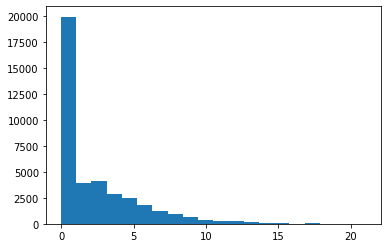

In [76]:
plt.hist(amnt_of_hashtags(non_outliers_2_df['hashtags']), bins = 20)

In [23]:
def pct_atlst1(x):
    atlst1 = 0
    for i in x:
        if i > 0:
            atlst1 += 1
    return atlst1 / len(x)

In [79]:
print(pct_atlst1(amnt_of_hashtags(outliers_2_df['hashtags'])))
print('\n')
print(pct_atlst1(amnt_of_hashtags(non_outliers_2_df['hashtags'])))

0.6235980260206371


0.6187650564219602


In [25]:
def extract_hashtags(x, unique = False):
    hashtags = []
    for i in x:
        # the lists of hashtags are stored as string representation of a list
        hashtags = hashtags + i.replace("'", "").strip('][').split(', ')
    if unique:
        return np.unique(hashtags)
    else:
        return hashtags

In [26]:
outliers_hashtags_1 = extract_hashtags(outliers_1_df['hashtags'])
outliers_hashtags_2 = extract_hashtags(outliers_2_df['hashtags'])
non_outliers_hashtags_1 = extract_hashtags(non_outliers_1_df['hashtags'])
non_outliers_hashtags_2 = extract_hashtags(non_outliers_2_df['hashtags'])

In [27]:
def freq_list(x):  
    freq = {} 
    for i in x: 
        if (i in freq): 
            freq[i] += 1
        else: 
            freq[i] = 1
    return freq

In [28]:
sorted(freq_list(outliers_hashtags_1).items(), key=lambda x: x[1], reverse=True)

[('', 1725),
 ('fyp', 762),
 ('foryou', 711),
 ('foryoupage', 430),
 ('viral', 190),
 ('duet', 161),
 ('trending', 151),
 ('tiktok', 145),
 ('comedy', 106),
 ('funny', 103),
 ('tiktokindia', 75),
 ('parati', 64),
 ('xyzbca', 43),
 ('love', 41),
 ('fy', 37),
 ('tiktok_india', 35),
 ('trend', 32),
 ('foryourpage', 31),
 ('prank', 31),
 ('couplegoals', 30),
 ('dance', 29),
 ('learnontiktok', 28),
 ('fypシ', 26),
 ('halloween', 25),
 ('viralvideo', 25),
 ('edutok', 24),
 ('foru', 23),
 ('art', 23),
 ('lol', 23),
 ('cute', 23),
 ('greenscreen', 22),
 ('tutorial', 20),
 ('makeup', 19),
 ('food', 18),
 ('twins', 18),
 ('dog', 18),
 ('fitness', 18),
 ('comedia', 18),
 ('football', 17),
 ('meme', 17),
 ('amongus', 16),
 ('dúo', 16),
 ('couple', 16),
 ('crew07', 15),
 ('motivation', 14),
 ('ad', 13),
 ('teentigada', 13),
 ('challenge', 13),
 ('fun', 13),
 ('fashion', 13),
 ('bollywood', 13),
 ('TideLagaoDaagHatao', 13),
 ('fürdich', 13),
 ('sports', 13),
 ('basketball', 13),
 ('nba', 13),
 ('nfl'

In [29]:
sorted(freq_list(non_outliers_hashtags_1).items(), key=lambda x: x[1], reverse=True)

[('', 14269),
 ('fyp', 6337),
 ('foryou', 5714),
 ('foryoupage', 3288),
 ('viral', 1564),
 ('tiktok', 1356),
 ('trending', 1231),
 ('duet', 1039),
 ('comedy', 792),
 ('funny', 736),
 ('tiktokindia', 684),
 ('parati', 526),
 ('love', 426),
 ('xyzbca', 342),
 ('dance', 340),
 ('fy', 320),
 ('foryourpage', 301),
 ('tiktok_india', 299),
 ('halloween', 257),
 ('prank', 231),
 ('trend', 215),
 ('ad', 207),
 ('fypシ', 206),
 ('viralvideo', 204),
 ('edutok', 204),
 ('couplegoals', 203),
 ('art', 194),
 ('fitness', 194),
 ('cute', 190),
 ('learnontiktok', 187),
 ('foru', 175),
 ('dog', 175),
 ('tutorial', 170),
 ('greenscreen', 163),
 ('comedia', 158),
 ('рекомендации', 151),
 ('lol', 148),
 ('football', 146),
 ('bollywood', 146),
 ('bangenergy', 140),
 ('basketball', 138),
 ('motivation', 136),
 ('sports', 135),
 ('TideLagaoDaagHatao', 134),
 ('dogsoftiktok', 133),
 ('food', 131),
 ('makeup', 130),
 ('meme', 127),
 ('challenge', 125),
 ('dúo', 125),
 ('nfl', 119),
 ('crew07', 118),
 ('рек', 117

In [39]:
sorted(test.items(), key=lambda x: x[1], reverse=True)

[('fyp', 410),
 ('foryou', 357),
 ('foryoupage', 208),
 ('viral', 94),
 ('duet', 81),
 ('tiktok', 79),
 ('trending', 71),
 ('comedy', 55),
 ('funny', 51),
 ('tiktokindia', 38),
 ('parati', 31),
 ('love', 24),
 ('fy', 21),
 ('trend', 20),
 ('foryourpage', 19),
 ('xyzbca', 18),
 ('halloween', 17),
 ('fypシ', 15),
 ('dance', 15),
 ('learnontiktok', 15),
 ('tiktok_india', 15),
 ('art', 15),
 ('prank', 14),
 ('tutorial', 14),
 ('foru', 13),
 ('greenscreen', 12),
 ('lol', 12),
 ('edutok', 12),
 ('fitness', 12),
 ('food', 11),
 ('viralvideo', 11),
 ('couplegoals', 11),
 ('dúo', 10),
 ('motivation', 10),
 ('cute', 10),
 ('comedia', 10),
 ('ad', 9),
 ('fun', 9),
 ('WeWinTogether', 9),
 ('bollywood', 9),
 ('couple', 9),
 ('football', 9),
 ('goviral', 8),
 ('amongus', 8),
 ('twins', 8),
 ('crew07', 8),
 ('sports', 8),
 ('meme', 8),
 ('basketball', 8),
 ('joker', 8),
 ('nba', 8),
 ('workout', 7),
 ('youtube', 7),
 ('asmr', 7),
 ('greenscreenvideo', 7),
 ('dog', 7),
 ('crazy', 7),
 ('dogsoftiktok', 

In [31]:
test = freq_list(outliers_hashtags_2)
del test['']
test

{'foryoupage': 208,
 'fyp': 410,
 'johncena': 1,
 'viral': 94,
 'sylvesterstallone': 1,
 'DaBaby': 1,
 'trending': 71,
 'wildnout': 1,
 'new': 1,
 'skit': 2,
 'comedy': 55,
 'gadgets': 1,
 'travel': 1,
 'hacks': 2,
 'cake': 4,
 'loop': 1,
 'food': 11,
 'ridiculousness': 1,
 'americasweetheart': 1,
 'foryou': 357,
 'foru': 13,
 'foryourpage': 19,
 'Chipotle53': 1,
 'Sweepstakes': 2,
 'ad': 9,
 'poolstereotypes': 1,
 'funny': 51,
 'tanlines': 1,
 'modinha': 1,
 'zuera': 1,
 'sosia': 1,
 'vindiesel': 1,
 'brasil': 2,
 'geraçãotiktok': 1,
 'cosplay': 3,
 'fastandfurious': 1,
 'sbtonline': 1,
 'Freshshoechallenge': 1,
 'AalyahMysterio': 1,
 'Murphy': 1,
 'ReyMysterio': 1,
 'WWE': 1,
 'SmackDown': 1,
 'DadsCanDance': 1,
 'SavageLove': 2,
 'therock': 1,
 'dwaynejohnson': 1,
 'actor': 2,
 'dwaynetherockjohnson': 1,
 'training': 3,
 'underarmour': 1,
 'aest': 1,
 'pool': 1,
 'magic': 2,
 'WrapBattle': 1,
 'sponsored': 3,
 'MyPride': 1,
 'puppy': 4,
 'stayhomestaystrong': 1,
 'mrsiglesias': 1,
 

In [47]:
len(test)

2750

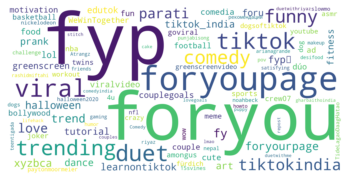

In [117]:
wc = WordCloud(background_color="white", max_words=100, width=2000, height=1000).generate_from_frequencies(test)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('hash_wordcloud.png')